# Klasyfikacja zbioru CIFAR-100


In [1]:
from keras.datasets import cifar100

from keras import models
from keras import layers
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

**Przygotowanie danych**

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
print('Train dataset')
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print('Test dataset')
print(test_images.shape)
print(len(test_labels))
print(test_labels)

169009152/169001437 [==============================] - 7s 0us/step
Train dataset
(50000, 32, 32, 3)
50000
[[19]
 [29]
 [ 0]
 ...
 [ 3]
 [ 7]
 [73]]
Test dataset
(10000, 32, 32, 3)
10000
[[49]
 [33]
 [72]
 ...
 [51]
 [42]
 [70]]


*   Zbiór CIFAR-100 składa się z obrazów o 100 kategoriach 
*   Zbiór treningowy składa się z 60000 obrazów o rozmiarze 32x32 
*   Zbiór testowy składa się z 10000 obrazów o rozmiarze 32x32 

In [3]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Tworzenie sieci**

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=64, epochs=40, verbose=1, validation_data=(test_images, test_labels))

model.save('cifar100_model.h5') 

Epoch 1/40
782/782 [==============================] - 58s 72ms/step - loss: 1.9249 - accuracy: 0.4773 - val_loss: 2.5196 - val_accuracy: 0.3825
Epoch 2/40
782/782 [==============================] - 56s 72ms/step - loss: 1.8234 - accuracy: 0.5017 - val_loss: 2.4716 - val_accuracy: 0.3856
Epoch 3/40
782/782 [==============================] - 56s 72ms/step - loss: 1.7383 - accuracy: 0.5231 - val_loss: 2.4722 - val_accuracy: 0.3897
Epoch 4/40
782/782 [==============================] - 57s 73ms/step - loss: 1.6608 - accuracy: 0.5397 - val_loss: 2.4940 - val_accuracy: 0.3832
Epoch 5/40
782/782 [==============================] - 56s 72ms/step - loss: 1.5836 - accuracy: 0.5579 - val_loss: 2.5240 - val_accuracy: 0.3929
Epoch 6/40
782/782 [==============================] - 57s 73ms/step - loss: 1.5126 - accuracy: 0.5745 - val_loss: 2.6232 - val_accuracy: 0.3880
Epoch 7/40
782/782 [==============================] - 58s 74ms/step - loss: 1.4399 - accuracy: 0.5943 - val_loss: 2.6015 - val_accuracy:

**Sprawdzenie modelu**

In [ ]:
cifar100_model = models.load_model('cifar100_model.h5')

test_loss, test_acc = cifar100_model.evaluate(test_images, test_labels)

print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 6.3025 - accuracy: 0.3526
Test Loss 6.302538871765137
Test Accuracy 0.35260000824928284


313/313 [==============================] - 4s 12ms/step


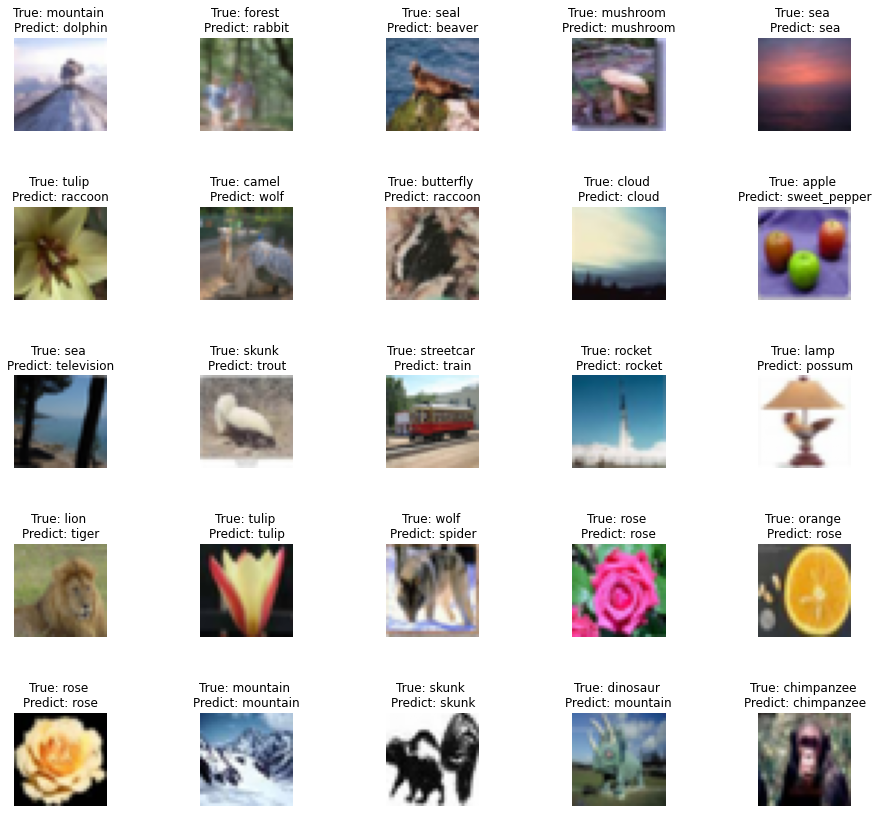

In [10]:
pred = cifar100_model.predict(test_images)
pred_classes = np.argmax(pred, axis=1)


fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()


class_names =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)